In [1]:
# импортируем библиотеки 
import pandas as pd
import requests
import urllib
import json
from urllib.parse import urlencode 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px

In [2]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' # считываем данные по пользователеям 
public_key = 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg' 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
download_response = requests.get(download_url) 
df_customers = pd.read_csv(download_url) 

In [3]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' # считываем данные по заказам 
public_key = 'https://disk.yandex.ru/d/0zWmh1bYP6REbw' 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
download_response = requests.get(download_url) 
df_orders = pd.read_csv(download_url) 

In [4]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' # считываем данные по товарным позициям
public_key = 'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg' 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
download_response = requests.get(download_url) 
df_order_items = pd.read_csv(download_url) 

In [6]:
# смотрим на структуру данных 
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [11]:
# смотрим на типы данных, есть ли пропущенные значения, размер дф
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
# смотрим есть ли повторяющиеся значения
df_customers.duplicated().sum()

0

In [12]:
# смотрим на структуру данных 
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
# смотрим на типы данных, есть ли пропущенные значения, размер дф. Есть пропущенные значения, типы данных 
# с датами будем преобразовывать по мере необходимости 
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
# есть пропущенные значения в колонках с датами, но это объяснимо, не все заказы оплачиваются/доставляются
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [15]:
# смотрим есть ли повторяющиеся значения
df_orders.duplicated().sum()

0

In [16]:
# смотрим на структуру данных 
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [17]:
# смотрим на типы данных, есть ли пропущенные значения, размер дф
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
# смотрим есть ли повторяющиеся значения
df_order_items.duplicated().sum()

0

1. Сколько у нас пользователей, которые совершили покупку только один раз?

В данном задании и далее по проекту под пользователями, которые совершили покупку я понимаю, пользователей, которые произвели оплату заказа, независимо от того на какой стадии исполнения находится заказ, а также был в итоге исполнен заказ или нет, в том числе по причине его отмены. 
Обоснование:
В момент оплаты товара между клиентом и компанией заключается договор купли-продажи (совершается покупка), по которому 
у покупателя (клиента) появляется право требовать передачи товара. 
Неоплаченный заказ, добавленный в корзину, никаких отношений между сторонами не создает, поэтому все созданные заказы 
нельзя рассматривать, как совершение покупки. Связывать совершенную покупку, только с той, по которой заказ был успешно 
доставлен и передан покупателю (отсутствует возврат), некорректно, т.к. договор был заключен, а при отмене заказа 
он расторгается, но не пропадает бесследно и влечет определенные последствия, в частности, возврат денег клиенту. 

In [19]:
# объединяем таблицы пользователей и заказов
customers_and_orders = pd.merge(df_customers, df_orders, on=['customer_id']) 
customers_and_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [147]:
# удаляем строки с отсуствующими данными по оплате заказа, чтобы остались только заказы, по которым прошли оплаты
customers_and_orders = customers_and_orders.dropna(subset=['order_approved_at']) 

In [148]:
# 1. Группируем по уникальным пользователям
# 2. Считаем количество заказов, созданных каждым пользователем
# 3. Оставляем только тех пользователей, у кого колличество заказов равно 1
# 4. Количество строк будет являться количеством пользователей, которые совершили покупку только один раз

customers_and_orders.groupby('customer_unique_id', as_index=False) \
                    .agg({'order_id':'count'}) \
                    .query('order_id == 1') \
                    .shape


(93049, 2)

Ответ: 93049 пользователя совершили покупку только один раз

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

Под заказами, которые не доставлены, в данном случае понимаю заказы, которые отменены или недоступны. 

In [43]:
# запишем исходный дф в новую переменную, чтобы можно было его изменять в рамках задания
df_orders_ex2 = df_orders

In [44]:
# в колонке с датами заказов оставляем только часть с датой и месяцем
df_orders_ex2.order_purchase_timestamp = pd.to_datetime(df_orders_ex2['order_purchase_timestamp']).dt.to_period("M")

In [45]:
# 1. Фильтруем по статусу заказа
# 2. Группируем по статусу и месяцу
# 3. Считаем количество заказов в каждом месяце
# 4. Записываем полученный дф в переменную df_orders_month

df_orders_month = df_orders_ex2.query('order_status == "unavailable" or order_status == "canceled"') \
        .groupby(['order_status', 'order_purchase_timestamp'], as_index=False) \
        .agg({'order_id':'count'})
df_orders_month.head()

,order_status,order_purchase_timestamp,order_id
0,canceled,2016-09,2
1,canceled,2016-10,24
2,canceled,2017-01,3
3,canceled,2017-02,17
4,canceled,2017-03,33


In [46]:
# 1. df_orders_month (количество заказов в месяц) группируем по статусу
# 2. Считаем среднее по заказам в месяц
# 3. Округляем до 1 знака после запятой
# 4. Переименовываем колонку 
df_orders_month_avg = df_orders_month.groupby('order_status', as_index=False) \
                .agg({'order_id':'mean'}) \
                .round(1) \
                .rename(columns={'order_id':'avg_quantity'})

In [47]:
df_orders_month_avg

,order_status,avg_quantity
0,canceled,26.0
1,unavailable,29.0


Ответ: В среднем 26 заказов в месяц не доставляется по причине отмены заказа, 29 - по причине недоступности. 

3. По каждому товару определить, в какой день недели товар чаще всего покупается. 

In [52]:
# объединяем таблицы заказов и товарных позиций, входящих в заказ
orders_and_items = pd.merge(df_orders, df_order_items, on=['order_id']) 
orders_and_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [53]:
# приводим колонку время создания заказа к нужному типу
orders_and_items['order_purchase_timestamp'] = pd.to_datetime(orders_and_items['order_purchase_timestamp'], format='%Y%m%d %H:%M:%S')

In [54]:
# создаем колонку с днем недели, когда был оформлен заказ
orders_and_items['day_of_week'] = orders_and_items.order_purchase_timestamp.dt.day_name()

In [56]:
# группиуем по ид товара и дню недели, считаем в какой день недели сколько покупалось товара каждого вида
max_day_of_week = orders_and_items.groupby(['product_id', 'day_of_week'], as_index=False) \
                                        .agg({'order_id':'count'}) \
                                        .sort_values('order_id', ascending=False)
max_day_of_week

,product_id,day_of_week,order_id
15902,422879e10f46682990de24d770e7f83d,Wednesday,93
36513,99a4788cb24856965c36a24e339b6058,Monday,92
41045,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
41041,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,87
41046,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,85
...,...,...,...
24013,642369377615febc7fa89e4c8df5110e,Thursday,1
24018,642a40d4d73b4b2604968937de13634a,Sunday,1
24022,642e125cbc752b4eeb8faf442319c39f,Thursday,1
24025,64315bd8c0c47303179dd2e25b579d00,Saturday,1


In [57]:
# оставляем строки с максимальным значением количества проданных товаров каждого вида
max_day_of_week = max_day_of_week.groupby('product_id', as_index=False).max()
max_day_of_week

,product_id,day_of_week,order_id
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Wednesday,1
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1
...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,Sunday,1
32947,fff81cc3158d2725c0655ab9ba0f712c,Monday,1
32948,fff9553ac224cec9d15d49f5a263411f,Friday,1
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2


In [58]:
#оставляем столбцы с ид товара и днем недели, в итоге получаем информацию о том, в какой день недели товар чаще всего покупается
max_day_of_week[['product_id', 'day_of_week']]

,product_id,day_of_week
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,Wednesday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,Sunday
32947,fff81cc3158d2725c0655ab9ba0f712c,Monday
32948,fff9553ac224cec9d15d49f5a263411f,Friday
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

In [92]:
# объединяем таблицы пользователей и заказов
customers_and_orders = pd.merge(df_customers, df_orders, on=['customer_id']) 
customers_and_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [93]:
# удаляем строки с отсуствующими данными по оплате заказа, чтобы остались только заказы, по которым прошли оплаты
customers_and_orders = customers_and_orders.dropna(subset=['order_approved_at']) 

In [94]:
# оставляем только нужные колонки для анализа
customers_and_orders = customers_and_orders[['customer_unique_id', 'order_id', 'order_approved_at']]
customers_and_orders.head()

,customer_unique_id,order_id,order_approved_at
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09


In [95]:
# приводим столбец с датой оплаты к нужному типу
customers_and_orders.order_approved_at = pd.to_datetime(customers_and_orders['order_approved_at'], format='%Y%m%d %H:%M:%S')

In [96]:
# создаем колонку с месяцем покупки 
customers_and_orders['month_of_purchase'] = customers_and_orders.order_approved_at.dt.to_period("M")
customers_and_orders.head()

,customer_unique_id,order_id,order_approved_at,month_of_purchase
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,2018-05
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,2018-07


In [97]:
# считаем количество покупок в месяц по каждому пользователю 
df_ex4 = customers_and_orders.groupby(['customer_unique_id', 'month_of_purchase'], as_index=False) \
                    .agg({'order_id':'count'}) \
                    .sort_values('order_id', ascending=False) \
                    .rename(columns={'order_id':'purchases'})
df_ex4.head()

,customer_unique_id,month_of_purchase,purchases
7316,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6
14471,25a560b9a6006157838aab1bdbd68624,2017-04,4
67664,b08fab27d47a1eb6deda07bfd965ad43,2017-09,4
50560,83e7958a94bd7f74a9414d8782f87628,2017-01,4
76689,c8460e4251689ba205045f3ea17884a1,2018-08,4


In [98]:
# считаем количество дней в каждом месяце
df_ex4['days_in_month'] = df_ex4.month_of_purchase.dt.days_in_month
df_ex4.head()

,customer_unique_id,month_of_purchase,purchases,days_in_month
7316,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,31
14471,25a560b9a6006157838aab1bdbd68624,2017-04,4,30
67664,b08fab27d47a1eb6deda07bfd965ad43,2017-09,4,30
50560,83e7958a94bd7f74a9414d8782f87628,2017-01,4,31
76689,c8460e4251689ba205045f3ea17884a1,2018-08,4,31


In [99]:
# считаем количество недель в каждом месяце, округляем до 2 знаков после запятой
df_ex4['weeks_in_month'] = (df_ex4.days_in_month / 7).round(2)
df_ex4.head()

,customer_unique_id,month_of_purchase,purchases,days_in_month,weeks_in_month
7316,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,31,4.43
14471,25a560b9a6006157838aab1bdbd68624,2017-04,4,30,4.29
67664,b08fab27d47a1eb6deda07bfd965ad43,2017-09,4,30,4.29
50560,83e7958a94bd7f74a9414d8782f87628,2017-01,4,31,4.43
76689,c8460e4251689ba205045f3ea17884a1,2018-08,4,31,4.43


In [102]:
# считаем среднее количество покупок в неделю по месяцам, округляем до 2 знаков после запятой, получаем ответ на вопрос
df_ex4['AVG_purchases_in_week'] = (df_ex4.purchases / df_ex4.weeks_in_month).round(2)
df_ex4.head()

,customer_unique_id,month_of_purchase,purchases,days_in_month,weeks_in_month,AVG_purchases_in_week
7316,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,31,4.43,1.35
14471,25a560b9a6006157838aab1bdbd68624,2017-04,4,30,4.29,0.93
67664,b08fab27d47a1eb6deda07bfd965ad43,2017-09,4,30,4.29,0.93
50560,83e7958a94bd7f74a9414d8782f87628,2017-01,4,31,4.43,0.90
76689,c8460e4251689ba205045f3ea17884a1,2018-08,4,31,4.43,0.90


5. Используя pandas, проведи когортный анализ пользователей. 
В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [108]:
# объединяем таблицы пользователей и заказов
customers_and_orders = pd.merge(df_customers, df_orders, on=['customer_id']) 


In [110]:
# удаляем строки с отсуствующими данными по оплате заказа, чтобы остались только заказы, по которым прошли оплаты
customers_and_orders = customers_and_orders.dropna(subset=['order_approved_at']) 

In [111]:
# оставляем только нужные колонки для анализа
customers_and_orders = customers_and_orders[['customer_unique_id', 'order_approved_at']]
customers_and_orders.head()

,customer_unique_id,order_approved_at
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09


In [112]:
# приводим столбец с датой оплаты к нужному типу
customers_and_orders.order_approved_at = pd.to_datetime(customers_and_orders['order_approved_at'], format='%Y%m%d %H:%M:%S')
customers_and_orders.head()

,customer_unique_id,order_approved_at
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09


In [113]:
# создаем колонку с месяцем покупки 
customers_and_orders['month_of_purchase'] = customers_and_orders.order_approved_at.dt.to_period("M")
customers_and_orders.head()

,customer_unique_id,order_approved_at,month_of_purchase
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10,2018-05
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09,2018-07


In [114]:
# оставляем данные за 2017 год + 3 месяца 2018 года, чтобы не потерять клиентов, которые совершили покупки в конце 2017 года
customers_and_orders = customers_and_orders.query('month_of_purchase <= "2018-03" and month_of_purchase >= "2017-01"')
customers_and_orders.head()

,customer_unique_id,order_approved_at,month_of_purchase
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,2018-01
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,2018-03
5,4c93744516667ad3b8f1fb645a3116a4,2017-09-14 18:25:11,2017-09
6,addec96d2e059c80c30fe6871d30d177,2018-02-19 14:50:37,2018-02


In [115]:
# создаем дф с информацией о дате первой покупки каждого пользовтателя
first_purchase = customers_and_orders.groupby('customer_unique_id', as_index=False) \
                    .agg({'month_of_purchase': 'min'}) \
                    .rename(columns={'month_of_purchase': 'first_purchase'})
first_purchase.head()

,customer_unique_id,first_purchase
0,0000f46a3911fa3c0805444483337064,2017-03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10
2,0004aac84e0df4da2b147fca70cf8255,2017-11
3,00053a61a98854899e70ed204dd4bafe,2018-02
4,0005e1862207bf6ccc02e4228effd9a0,2017-03


In [116]:
#объединяем изначальный дф с дф, содержащим информацию о дате первой покупки 
customers_and_orders_merge = customers_and_orders.merge(first_purchase, how='left', on='customer_unique_id')
customers_and_orders_merge.head()

,customer_unique_id,order_approved_at,month_of_purchase,first_purchase
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,2018-01,2018-01
2,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,2018-03,2018-03
3,4c93744516667ad3b8f1fb645a3116a4,2017-09-14 18:25:11,2017-09,2017-09
4,addec96d2e059c80c30fe6871d30d177,2018-02-19 14:50:37,2018-02,2018-02


In [117]:
# 1.Группируем дф и считаем уникальных клиентов
# 2.Видим сколько уникальных клиентов и когда совершили первую покупку, а также когда и сколько из них совершили последующие
cohorts = customers_and_orders_merge.groupby(['first_purchase', 'month_of_purchase']) \
                            .agg({'customer_unique_id':'nunique'}) \
                            .rename(columns={'customer_unique_id':'total_customer'})
cohorts.head()

total_customer
first_purchase month_of_purchase                
2017-01        2017-01                       727
               2017-02                         4
               2017-03                         2
               2017-04                         1
               2017-05                         3

In [118]:
# нумеруем месяцы 
def cohort_period(cohorts):
    cohorts['сohort_period'] = np.arange(len(cohorts)) + 0
    return cohorts

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

total_customer  сohort_period
first_purchase month_of_purchase                               
2017-01        2017-01                       727              0
               2017-02                         4              1
               2017-03                         2              2
               2017-04                         1              3
               2017-05                         3              4

In [119]:
# меняем индексацию 
cohorts.reset_index(inplace=True)
cohorts.set_index(['сohort_period', 'first_purchase'], inplace=True)
cohorts.head()

,,month_of_purchase,total_customer
сohort_period,first_purchase,,
0,2017-01,2017-01,727
1,2017-01,2017-02,4
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3


In [120]:
#создаем переменную, в которой содержится размер каждой когорты
cohort_group_size = cohorts['total_customer'].groupby(level=1).first()
cohort_group_size

first_purchase
2017-01     727
2017-02    1736
2017-03    2643
2017-04    2324
2017-05    3592
2017-06    3148
2017-07    3844
2017-08    4204
2017-09    4149
2017-10    4433
2017-11    7164
2017-12    5638
2018-01    6950
2018-02    6429
2018-03    7043
Freq: M, Name: total_customer, dtype: int64

In [121]:
#строим таблицу по кагортам, так, чтобы периоды когорт были наверху
cohorts = cohorts.total_customer.unstack(0)
cohorts

сohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13
first_purchase,,,,,,,,,,,,,,
2017-01,727.0,4.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,2.0,2.0,6.0,3.0,1.0
2017-02,1736.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,2.0,4.0,2.0,5.0,3.0,3.0
2017-03,2643.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,10.0,4.0,6.0,NaN
2017-04,2324.0,14.0,5.0,4.0,7.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,NaN,NaN
2017-05,3592.0,19.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,10.0,NaN,NaN,NaN
2017-06,3148.0,15.0,11.0,13.0,8.0,11.0,12.0,7.0,4.0,7.0,NaN,NaN,NaN,NaN
2017-07,3844.0,20.0,13.0,8.0,13.0,7.0,12.0,4.0,7.0,NaN,NaN,NaN,NaN,NaN
2017-08,4204.0,28.0,15.0,11.0,16.0,22.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4149.0,27.0,20.0,14.0,18.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
#считаем retention, для этого делим количество уникальных клиентов в каждом периоде на общее количество клиентов в каждой кагорте
retention = cohorts.divide(cohort_group_size, axis=0)
retention

сohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13
first_purchase,,,,,,,,,,,,,,
2017-01,1.0,0.005502,0.002751,0.001376,0.004127,0.001376,0.005502,0.001376,0.001376,0.002751,0.002751,0.008253,0.004127,0.001376
2017-02,1.0,0.002304,0.002304,0.001728,0.004032,0.001152,0.002304,0.001728,0.001152,0.002304,0.001152,0.002880,0.001728,0.001728
2017-03,1.0,0.004919,0.003405,0.003405,0.003405,0.001513,0.001513,0.003027,0.003027,0.001135,0.003784,0.001513,0.002270,NaN
2017-04,1.0,0.006024,0.002151,0.001721,0.003012,0.002582,0.003442,0.002582,0.003442,0.001721,0.002151,0.000861,NaN,NaN
2017-05,1.0,0.005290,0.005011,0.003898,0.003062,0.003341,0.004176,0.001670,0.002506,0.003062,0.002784,NaN,NaN,NaN
2017-06,1.0,0.004765,0.003494,0.004130,0.002541,0.003494,0.003812,0.002224,0.001271,0.002224,NaN,NaN,NaN,NaN
2017-07,1.0,0.005203,0.003382,0.002081,0.003382,0.001821,0.003122,0.001041,0.001821,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006660,0.003568,0.002617,0.003806,0.005233,0.002617,0.002617,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006508,0.004820,0.003374,0.004338,0.002651,0.002169,NaN,NaN,NaN,NaN,NaN,NaN,NaN


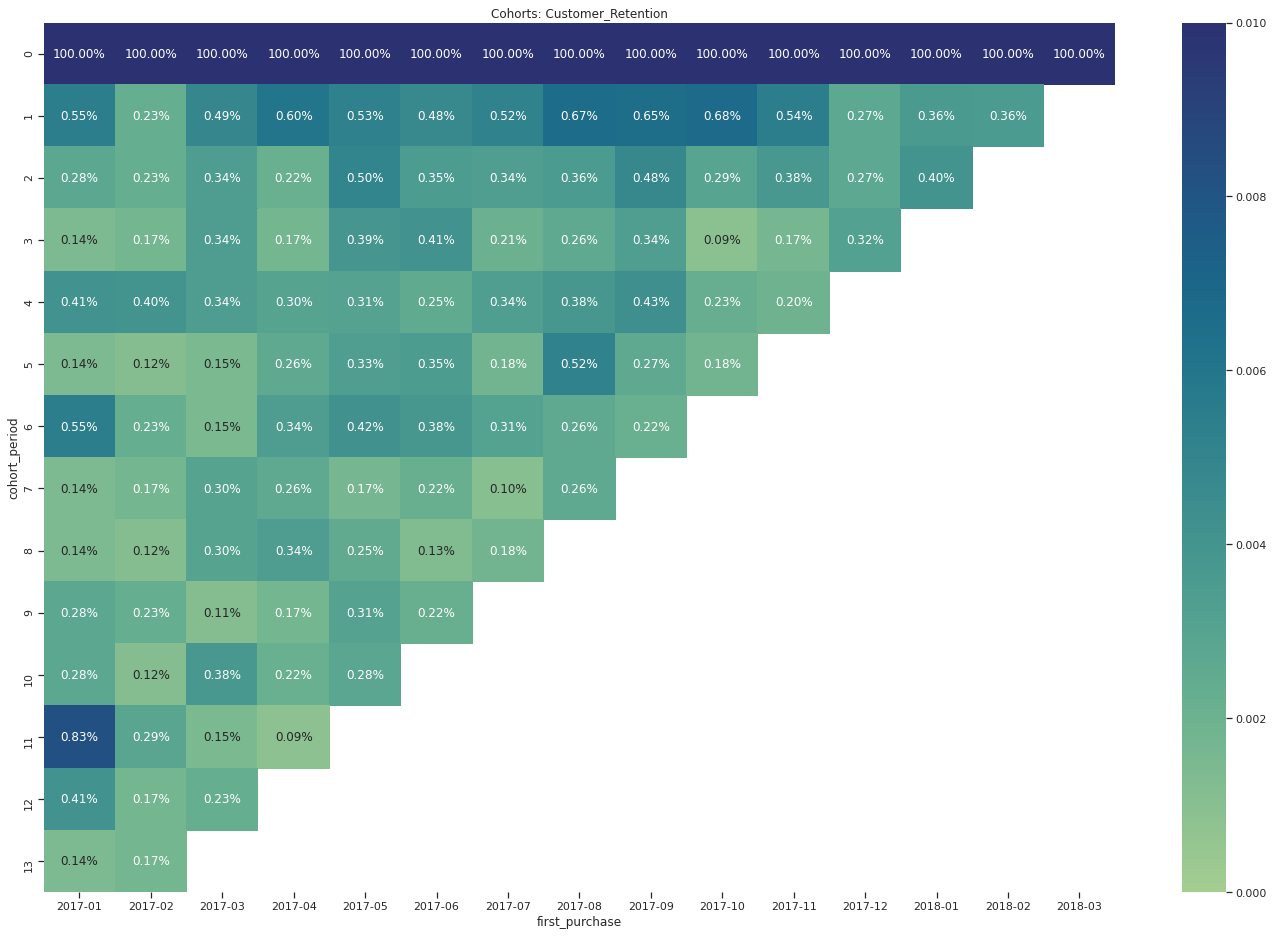

In [123]:
# визуализиаруем
sns.set(style='ticks')
plt.figure(figsize=(24, 16))
plt.title('Cohorts: Customer_Retention')
sns.heatmap(retention.T, vmin=0, vmax=0.01, cmap="crest", annot=True, fmt='.2%')

Ответ: на графике видно, что самый высокий retention на 3й месяц составляет 0.41% и приходится на кагорту клиентов "2017-06"

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. 

In [5]:
# объединяем таблицы пользователей и заказов
customers_and_orders = df_customers.merge(df_orders, on='customer_id', how='left')

In [6]:
# объединяем данные со всех таблиц
all_data = customers_and_orders.merge(df_order_items, on='order_id', how='left')
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [7]:
# удаляем строки с отсуствующими данными по оплате заказа, чтобы остались только заказы, по которым прошли оплаты
all_data = all_data.dropna(subset=['order_approved_at']) 

In [8]:
# оставляем только нужные столбцы
all_data = all_data[['customer_unique_id', 'order_id', 'order_approved_at', 'price']]
all_data.head()

,customer_unique_id,order_id,order_approved_at,price
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,230.00


In [9]:
# приводим дату оплаты к нужному типу и оставлем ее в формате гггг-мм-дд
all_data.order_approved_at = pd.to_datetime(all_data['order_approved_at'], format='%Y%m%d %H:%M:%S').dt.normalize()
all_data.head()

,customer_unique_id,order_id,order_approved_at,price
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29,230.00


In [10]:
# ищем дату последней покупки
all_data.order_approved_at.max()

Timestamp('2018-09-03 00:00:00')

In [11]:
# возьмем в качестве текущей даты - дату последней покупки из всех покупок
now = dt.datetime(2018,9,3)

In [12]:
rfm_data = all_data
rfm_data.head()

,customer_unique_id,order_id,order_approved_at,price
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29,230.00


In [13]:
# делаем таблицу с recency, frequency, monetary
rfm = rfm_data.groupby('customer_unique_id', as_index=False) \
                    .agg({'order_approved_at': lambda x: (now - x.max()).days, 
                        'order_id': lambda x: len(x.unique()), 
                        'price': lambda x: x.sum()}) \
                    .rename(columns={'order_approved_at':'recency', 'order_id':'frequency','price':'monetary'})

rfm.recency = rfm.recency.astype(int)

In [14]:
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


In [15]:
# используем квантили для определения границ метрик
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary
0.25,119.0,1.0,46.40
0.50,224.0,1.0,89.00
0.75,353.0,1.0,154.17


In [16]:
# записываем квантили в словарик для удобста написания функций
quantiles = quantiles.to_dict()

In [17]:
quantiles

{'recency': {0.25: 119.0, 0.5: 224.0, 0.75: 353.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary': {0.25: 46.4, 0.5: 89.0, 0.75: 154.17}}

In [18]:
# пишем функции для применения границ метрик и оценивания
# Границы метрик для recency: 
# 4 балла - 119 и менее дней
# 3 балла - 120-224 дней 
# 2 балла - 225-353 дней
# 1 балл - 354 и более дней 
#
# Границы метрик для monetary: 
# 4 балла - более 154$
# 3 балла -  89-154$ 
# 2 балла - 46-88$
# 1 балл - менее 46$ 

def r_score(x):
    if x <= quantiles['recency'][.25]:
        return 4
    elif x <= quantiles['recency'][.5]:
        return 3
    elif x <= quantiles['recency'][.75]:
        return 2
    else:
        return 1

def m_score(x):
    if x <= quantiles['monetary'][.25]:
        return 1
    elif x <= quantiles['monetary'][.5]:
        return 2
    elif x <= quantiles['monetary'][.75]:
        return 3
    else:
        return 4  

In [19]:
# для frequency история с квантилями не подходит, так как бОльшая часть клиентов совершили 1 покупку, учитывая это, вижу 
# целесообразным ввести следующую систему оценивания:
# 1 балл - 1 покупка
# 2 балла - 2 покупки
# 3 балла - 3-4 покупки
# 4 балла - 5 и более покупок
# пишем функцию для применения границ метрик и оценивания frequency
def f_score(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif 3 <= x <= 4:
        return 3
    else:
        return 4

In [20]:
# применяем функции к дф
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['monetary'].apply(lambda x: m_score(x))

In [21]:
# считаем итоговую оценку
rfm['rfm_score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4,214


Теперь нужно сегментировать клиентов и описать каждый из сегментов. Так как возможных сочетаний 64, то используем только R и F оценки. 
Всего выделим 10 сегментов:
1. hibernating - Покупали очень давно и один раз
2. about to sleep - Покупали давно и один раз
3. at risk - Покупали относительно давно со средней частотой
4. can't loose - Покупали давно, но часто
5. promising - Купили относительно недавно и пропали
6. need attention - Покупатели со средней частотой покупок, последняя покупка не очень давно
7. loyal customers - Покупают на регулярной основе.
8. new customers - Купили недавно один раз
9. potential loyalists - Недавние клиенты со средней частотой.
10. the best - покупали недавно, покупают часто 


In [22]:
# сегментируем клиентов
segt_map = {
    r'11': 'hibernating',
    r'21': 'about to sleep',
    r'[1-2]2': 'at risk',
    r'[1-2][3-4]': 'can\'t loose',
    r'31': 'promising',
    r'32': 'need attention',
    r'3[3-4]': 'loyal customers',
    r'41': 'new customers',
    r'42': 'potential loyalists',
    r'4[3-4]': 'the best'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,rfm_score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,3,413,new customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,new customers
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,about to sleep
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4,214,about to sleep


In [23]:
# считаем количество клиентов в каждом сегменте 
rfm = rfm.groupby('Segment', as_index=False) \
        .agg({'customer_unique_id':'count'}) \
        .sort_values('customer_unique_id', ascending=False)
rfm

,Segment,customer_unique_id
6,new customers,23318
3,hibernating,23295
8,promising,23273
0,about to sleep,23163
1,at risk,1235
7,potential loyalists,745
5,need attention,728
2,can't loose,89
9,the best,82
4,loyal customers,69
